# FIRST RUN generateFEEMplots

after running generateFEEMplots the variables F em and ex will be available for the fitting routine here.

In [85]:
% load the data. you have to restart kernel after every data change
load data.mat

# define functions to manipulate the data 

you can compress these boxes by clicking to the left so they won't "clutter" up the screen

In [86]:
function makecontourplot(F,em,ex)
 colormap('jet')
 h=surf(em,ex,F);
 shading interp
 hold on; [C,h]=contour3(em,ex,F,3,'k'); set(h,'linewidth',2); 
 set(gca,'linewidth',2,'fontsize',12)
 axis([min(em) max(em) min(ex) max(ex) 0 max(max(F))])
 view([0 90])
 hold on; plot3([250 600],[450 450],[0 0],'k','linewidth',2)
 hold on; plot3([600 600],[220 450],[0 0],'k','linewidth',2)
 h=xlabel('Emission (nm)'); set(h,'fontsize',12)
 h=ylabel('Excitation (nm)');  set(h,'fontsize',12)
 %add scale bar
 colorbar 
end

# visualize the original data


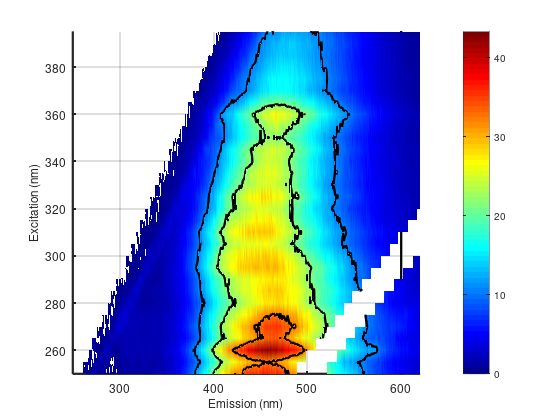

In [87]:
%contour plot over colourmap.
graphics_toolkit ("notebook"); 
makecontourplot(F,em,ex)

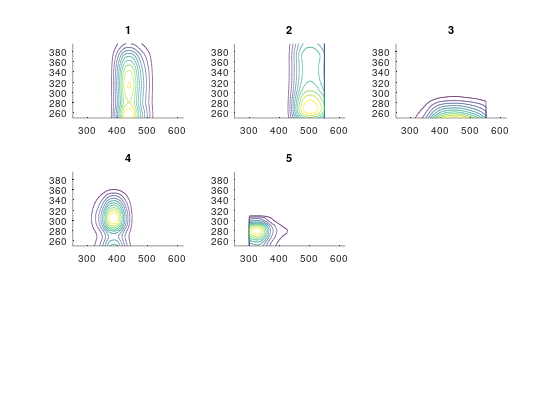

In [88]:
% load the model

load ID15154.mat %ex 250-500 em 300-350

% interpolate over this em and ex for the dataset

for i=1:C
    istr=num2str(i);
    txt=['Cem',istr','i=interp1(Cem,Cem',istr,',em); Cem',istr,'i(isnan(Cem',istr,'i))=0;'];
    eval(txt)
    txt=['Cex',istr','i=interp1(Cex,Cex',istr,',ex); Cex',istr,'i(isnan(Cex',istr,'i))=0;'];
    eval(txt)
    %Cex1i=interp1(Cex,Cex1,ex); Cex1i(isnan(Cex1i))=0; 
    %size(Cex1i)
    %size(Cem1i)
    txt=['F',istr,'=Cex',istr,'i''*Cem',istr,'i'';']; eval(txt);
    subplot(3,3,i); hold on;
    txt=['contour(em,ex,F',istr,')']; eval(txt)
    title(istr)
end
    

In [89]:
% fit to a linear model
FnoNaN=F; FnoNaN(isnan(FnoNaN))=0; % get rid of NaN in the original matrix

% brute force just write diff equation each different number of C (components)
if C==1;
    fcn=@(p)(sum(sum((FnoNaN-10^p(1).*F1).^2)));
    p0=[-6]; 
    [pmin,fval]=fminsearch(fcn,p0); p=10.^pmin
    relativeerror=fval./(sum(sum(FnoNaN.^2)))
    fitfcn=@(p)(p(1).*F1);
    Ffit=fitfcn(p);
end
if C==2
    fcn=@(p)(sum(sum((FnoNaN-10^p(1).*F1+10^p(2).*F2).^2)));
    p0=[-6;-6]; 
    [pmin,fval]=fminsearch(fcn,p0); p=10.^pmin
    relativeerror=fval./(sum(sum(FnoNaN.^2)))
    fitfcn=@(p)(p(1).*F1+p(2).*F2);
    Ffit=fitfcn(p);
end
if C==3
    fcn=@(p)(sum(sum((FnoNaN-10^p(1).*F1+10^p(2).*F2+10^p(3).*F3).^2)));
    p0=[-6;-6;-6]; 
    [pmin,fval]=fminsearch(fcn,p0); p=10.^pmin
    relativeerror=fval./(sum(sum(FnoNaN.^2)))
    fitfcn=@(p)(p(1).*F1+p(2).*F2+p(3).*F3);
    Ffit=fitfcn(p);
end
if C==4
    fcn=@(p)(sum(sum((FnoNaN-10^p(1).*F1+10^p(2).*F2+10^p(3).*F3+10^p(4).*F4).^2)));
    p0=[-6;-6;-6;-6]; 
    [pmin,fval]=fminsearch(fcn,p0); p=10.^pmin
    relativeerror=fval./(sum(sum(FnoNaN.^2)))
    fitfcn=@(p)(p(1).*F1+p(2).*F2+p(3).*F3+p(4).*F4);
    Ffit=fitfcn(p);
end
if C==5
    fcn=@(p)(sum(sum((FnoNaN-10^p(1).*F1+10^p(2).*F2+10^p(3).*F3+10^p(4).*F4+10^p(5).*F5).^2)));
    p0=[-6;-6;-6;-6;-6]; 
    [pmin,fval]=fminsearch(fcn,p0); p=10.^pmin
    relativeerror=fval./(sum(sum(FnoNaN.^2)))
    fitfcn=@(p)(p(1).*F1+p(2).*F2+p(3).*F3+p(4).*F4+p(5).*F5);
    Ffit=fitfcn(p);
end

if C==6
    fcn=@(p)(sum(sum((FnoNaN-10^p(1).*F1+10^p(2).*F2+10^p(3).*F3+10^p(4).*F4+10^p(5).*F5+10^p(6).*F6).^2)));
    p0=[-6;-6;-6;-6;-6;-6]; 
    [pmin,fval]=fminsearch(fcn,p0); p=10.^pmin
    relativeerror=fval./(sum(sum(FnoNaN.^2)))
    fitfcn=@(p)(p(1).*F1+p(2).*F2+p(3).*F3+p(4).*F4+p(5).*F5+p(6).*F6);
    Ffit=fitfcn(p);
end

if C==7
    fcn=@(p)(sum(sum((FnoNaN-10^p(1).*F1+10^p(2).*F2+10^p(3).*F3+10^p(4).*F4+10^p(5).*F5+10^p(6).*F6+10^p(7).*F7).^2)));
    p0=[-6;-6;-6;-6;-6;-6;-6]; 
    [pmin,fval]=fminsearch(fcn,p0); p=10.^pmin
    relativeerror=fval./(sum(sum(FnoNaN.^2)))
    fitfcn=@(p)(p(1).*F1+p(2).*F2+p(3).*F3+p(4).*F4+p(5).*F5+p(6).*F6+p(7).*F7);
    Ffit=fitfcn(p);
end

if C==8
    fcn=@(p)(sum(sum((FnoNaN-10^p(1).*F1+10^p(2).*F2+10^p(3).*F3+10^p(4).*F4+10^p(5).*F5+10^p(6).*F6+10^p(7).*F7+10^p(8).*F8).^2)));
    p0=[-6;-6;-6;-6;-6;-6;-6;-6]; 
    [pmin,fval]=fminsearch(fcn,p0); p=10.^pmin
    relativeerror=fval./(sum(sum(FnoNaN.^2)))
    fitfcn=@(p)(p(1).*F1+p(2).*F2+p(3).*F3+p(4).*F4+p(5).*F5+p(6).*F6+p(7).*F7+p(8).*F8);
    Ffit=fitfcn(p);
end

p,1
1,549.109
2,4.97783e-08
3,7.25229e-10
4,8.24033e-08
5,1.06497e-07


relativeerror = 0.2381


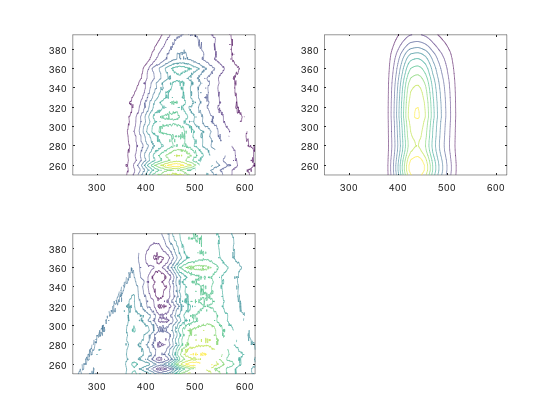

In [90]:
subplot(221)
contour(em,ex,F)
subplot(222)
contour(em,ex,Ffit)
subplot(223)
contour(em,ex,F-Ffit)